# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
billboards = pd.read_csv('../assets/billboard.csv')
billboards_df = pd.DataFrame(billboards)
billboards.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Create a data dictionary for the data set. (ie: describe the variables of your dataset)

In [3]:
data = {}

##### Write a brief description of your data, and any interesting observations you've made thus far. 

In [4]:
billboards_df.describe()

,year,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. 

In [5]:
# Renaming some columns.
billboards_df.rename(columns = {'artist.inverted': 'artist', 'x13th.wek': 'x13th.week',
                               'date.entered': 'date_entered', 'date.peaked': 'date_peaked'}, inplace = True)

# Renaming artist to properly display.
billboards_df.artist[22] = '98 Degrees'

# Fixing a genre name.
billboards_df.genre.replace('R&B\n', 'R&B', inplace = True)

# Renaming more columns!
headers = list(billboards_df.columns)
headers = [header.replace('x', '') for header in headers]
headers = [header.replace('.', '_') for header in headers]
billboards_df.columns = headers

# Floating values in 1st week to match the floats in all other weeks.
billboards['1st_week'] = [float(i) for i in billboards_df['1st_week']]

# Removing columns that contain only NaN values.
billboards_df.drop(billboards_df.ix[:, 72:], axis = 1, inplace = True)

# Converting date string to date time stamp.
billboards_df['date_entered'] = pd.to_datetime(billboards_df['date_entered'])
billboards_df['date_peaked'] = pd.to_datetime(billboards_df['date_peaked'])

billboards_df.head()

# np.isnan(billboards_df.ix[1, 7:])

# length = sum(~(np.isnan(billboards_df.ix[1, ])))
# length

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,year,artist,track,time,genre,date_entered,date_peaked,1st_week,2nd_week,3rd_week,...,56th_week,57th_week,58th_week,59th_week,60th_week,61st_week,62nd_week,63rd_week,64th_week,65th_week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [29]:
weeks = list(billboards_df.ix[:, 7:])

weekly_ranking = pd.melt(billboards_df, id_vars = ['artist', 'track', 'genre'], value_vars = weeks, 
                         var_name = 'Week_Number', value_name = 'Ranking')

weekly_ranking.head(6)

,artist,track,genre,Week_Number,Ranking
0,Destiny's Child,Independent Women Part I,Rock,1st_week,78.0
1,Santana,"Maria, Maria",Rock,1st_week,15.0
2,Savage Garden,I Knew I Loved You,Rock,1st_week,71.0
3,Madonna,Music,Rock,1st_week,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),Rock,1st_week,57.0
5,Janet,Doesn't Really Matter,Rock,1st_week,59.0


## Step 3: Visualize your data.

##### Using a plotting utility of your choice, create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data.

In [7]:
unique_genre = billboards_df.genre.unique()
unique_artist = billboards_df.artist.unique()

unique_genre_counts = [sum(billboards_df.genre == unique_genre[i]) for i in range(len(unique_genre))]
unique_artist_counts = [sum(billboards_df.artist == unique_artist[i]) for i in range(len(unique_artist))]

num_genre = {unique_genre[i]:sum(billboards_df.genre == unique_genre[i]) for i in range(len(unique_genre))}
num_artist = {unique_artist[i]:sum(billboards_df.artist == unique_artist[i] for i in range(len(unique_artist)))}

genre_counts = pd.DataFrame({'genre': unique_genre, 'counts': unique_genre_counts})
artist_counts = pd.DataFrame({'artist': unique_artist, 'counts': unique_artist_counts})
artist_counts.sort('counts', ascending = False, inplace = True)
genre_counts.sort('counts', ascending = False, inplace = True)

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [8]:
#Average ranking of each track.

sorted_track = weekly_ranking.groupby(['track']).mean()
sorted_track = sorted_track.reset_index().sort('Ranking')
sorted_track.head()

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,track,Ranking
166,"Maria, Maria",10.500000
175,Music,13.458333
42,Bye Bye Bye,14.260870
106,Hot Boyz,14.333333
136,Independent Women Part I,14.821429


In [9]:
# Average ranking of each artist.

sorted_artist = weekly_ranking.groupby(['artist']).mean()
sorted_artist = sorted_artist.reset_index().sort('Ranking')
sorted_artist.head()

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,artist,Ranking
179,Santana,10.500000
64,"Elliott, Missy ""Misdemeanor""",14.333333
227,matchbox twenty,18.641026
155,N'Sync,18.648649
103,Janet,19.416667


In [10]:
# Average ranking of each genre. 

sorted_genre = weekly_ranking.groupby(['genre']).mean()
sorted_genre = sorted_genre.reset_index().sort('Ranking')
sorted_genre.head()

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,genre,Ranking
9,Rock,42.206803
4,Latin,47.653179
3,Jazz,51.800000
5,Pop,54.963504
7,Rap,56.236559


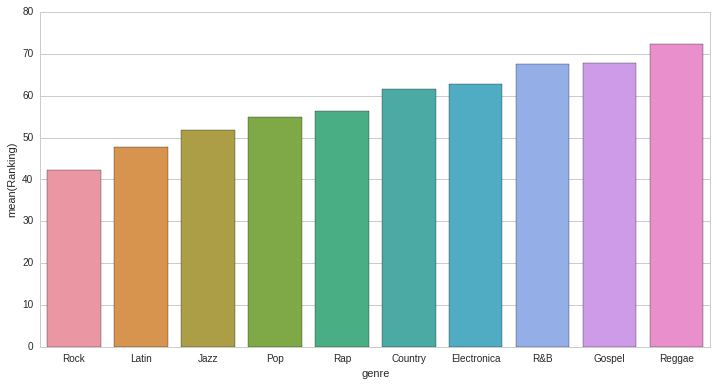

In [11]:
# Average ranking of genre visualized.

order = weekly_ranking

sns.set(style = 'whitegrid', rc = {'figure.figsize':(12, 6)})
sns.barplot(x = 'genre', y = 'Ranking', data = sorted_genre)

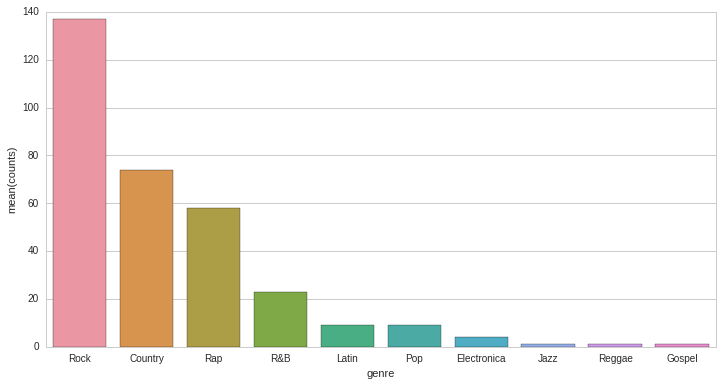

In [12]:
# Number of genres visualized.

sns.set(style = 'whitegrid', rc={'figure.figsize':(12, 6)})
sns.barplot(x = 'genre', y = 'counts', data = genre_counts)

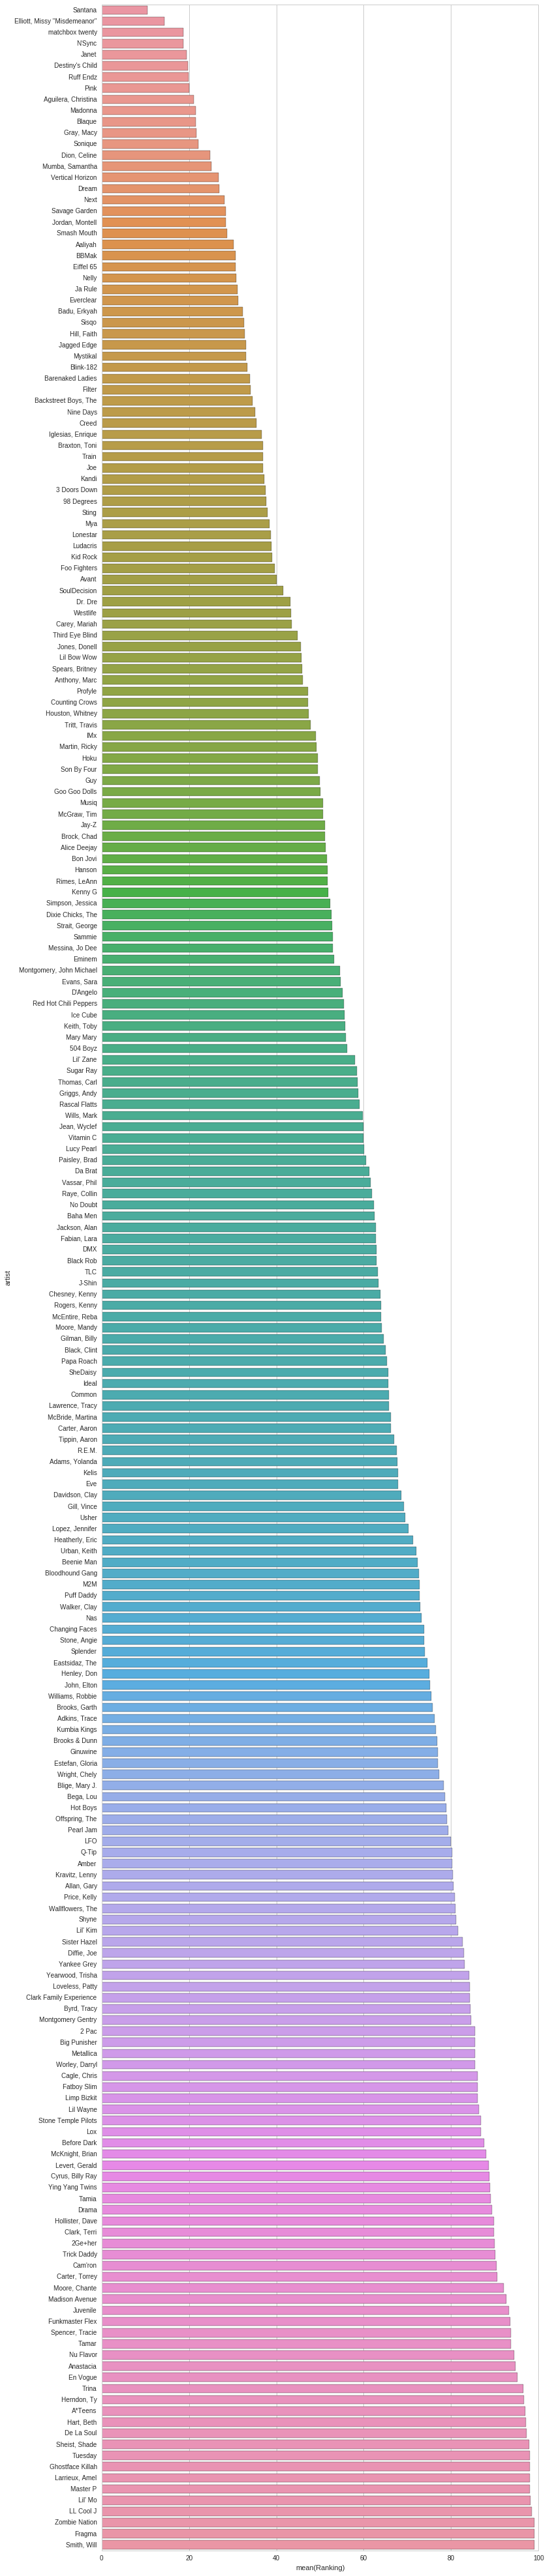

In [13]:
# Average ranking of each artist visualized. 

sns.set(style = 'whitegrid', rc = {'figure.figsize':(12, 70)})
sns.barplot(x = 'Ranking', y = 'artist', data = sorted_artist)

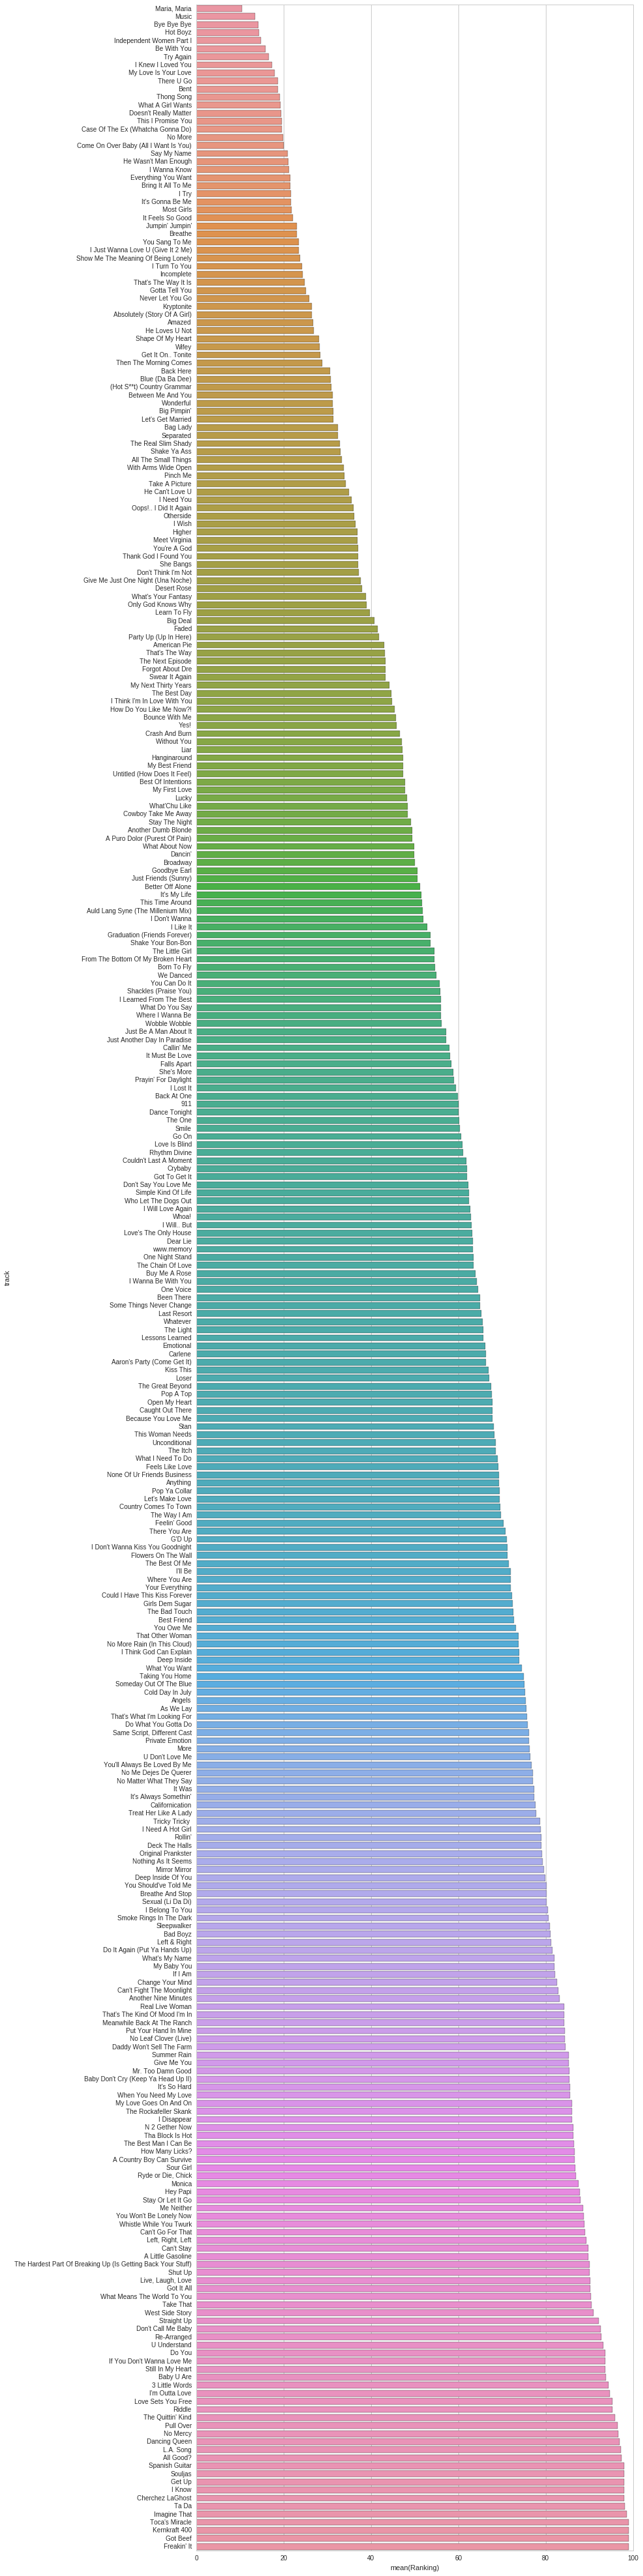

In [14]:
# Average ranking of each track visualized.

sns.set(style = 'whitegrid', rc = {'figure.figsize':(12, 70)})
sns.barplot(x = 'Ranking', y = 'track', data = sorted_track)

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

Does an artist's average performance on the billboards correlate to a nomination at the Grammys?


Grammy nominees + winners from the year 2000: http://www.rockonthenet.com/archive/2000/grammys.htm

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

- In order to get a list of the Grammy nominees and do something with that data, I'll need to create a dataframe with said data.
- For practical purposes, I'm going to only look at the top ten ranking artists. I'll create a separate dataframe containing these artists and add a column to it ("Nominations") that contains values depending on how many nominations the artist received.
- From here, I'll plot the artist's ranking versus the number of Grammy's they were nominated for to visualize the correlation (or lack thereof) between Grammy nominations and average billboard ranking. 

In [64]:
top_ten_artists = sorted_artist.head(10)

dict1 = {'Santana': 8, 'Elliott, Missy "Misdemeanor"': 1, 'matchbox twenty': 0,
                           "N'Sync": 0, 'Janet': 1, "Destiny's Child": 1, 'Ruff Endz': 0, 'Pink': 0, 
                            'Aguilera, Chistina': 2, 'Madonna': 2}

grammy_noms = pd.DataFrame(dict1, index = range(10), columns = ['Artist', 'Nominations'])

grammy_noms

# top_ten_artists.join(on = 'Artist'left')

,Artist,Nominations
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for roughly 800-1,000 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 600 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 